In [6]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


In [7]:
# Input data into dataframe
df = pd.read_csv('movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [10]:
# Find missing data percentage
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [12]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [14]:
# Find missing total missing data
missing_data = df.isnull()

for column in missing_data:
    print(column)
    print(missing_data[column].value_counts())
    print("")

name
name
False    7668
Name: count, dtype: int64

rating
rating
False    7591
True       77
Name: count, dtype: int64

genre
genre
False    7668
Name: count, dtype: int64

year
year
False    7668
Name: count, dtype: int64

released
released
False    7666
True        2
Name: count, dtype: int64

score
score
False    7665
True        3
Name: count, dtype: int64

votes
votes
False    7665
True        3
Name: count, dtype: int64

director
director
False    7668
Name: count, dtype: int64

writer
writer
False    7665
True        3
Name: count, dtype: int64

star
star
False    7667
True        1
Name: count, dtype: int64

country
country
False    7665
True        3
Name: count, dtype: int64

budget
budget
False    5497
True     2171
Name: count, dtype: int64

gross
gross
False    7479
True      189
Name: count, dtype: int64

company
company
False    7651
True       17
Name: count, dtype: int64

runtime
runtime
False    7664
True        4
Name: count, dtype: int64



In [16]:
# Replace missing value with NaN
df.replace('?', np.nan, inplace=True)

In [18]:
# Data types
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [20]:
# Make a copy of dataframe
df1 = df.copy(deep=True)
df1.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [22]:
# Drop missing value
df1.dropna(axis=0, inplace=True)

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 677.6+ KB


In [26]:
df1.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [28]:
# Change column data type
df1['budget'] = df1['budget'].astype('int64')
df1['gross'] = df1['gross'].astype('int64')

In [30]:
#Create correct year column
df1['yearcorrect'] = df1['released'].str.extract(pat='([0-9]{4})').astype(int)

In [32]:
df1.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [34]:
df1.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0,2015
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982


In [36]:
pd.set_option('display.max_rows', None)

In [38]:
df1.duplicated(keep=False)

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
17      False
18      False
20      False
21      False
22      False
23      False
28      False
29      False
33      False
35      False
36      False
37      False
42      False
46      False
48      False
50      False
51      False
53      False
56      False
57      False
58      False
75      False
77      False
80      False
92      False
94      False
95      False
96      False
97      False
98      False
99      False
100     False
101     False
103     False
105     False
106     False
108     False
110     False
112     False
113     False
114     False
115     False
117     False
118     False
119     False
120     False
121     False
122     False
126     False
127     False
128     False
129     False
130     False
131     False
132     False
133   

In [95]:
# budget high correlation
# company high correlation

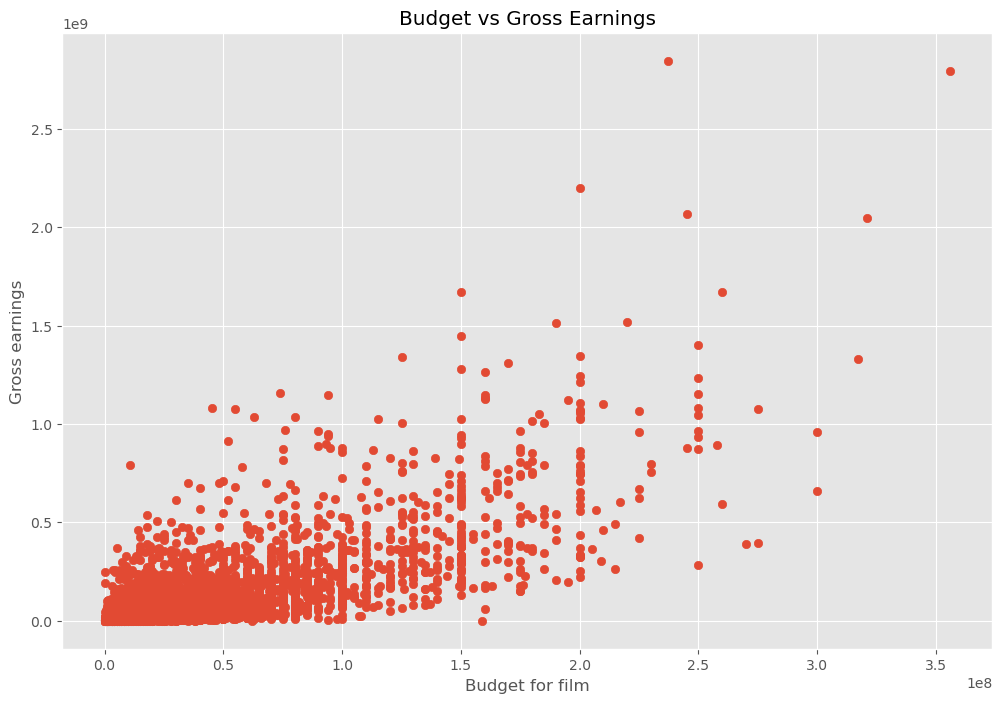

In [39]:
# Scatter plot Budget vs Gross

plt.scatter(x=df1['budget'], y=df1['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for film')
plt.ylabel('Gross earnings')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

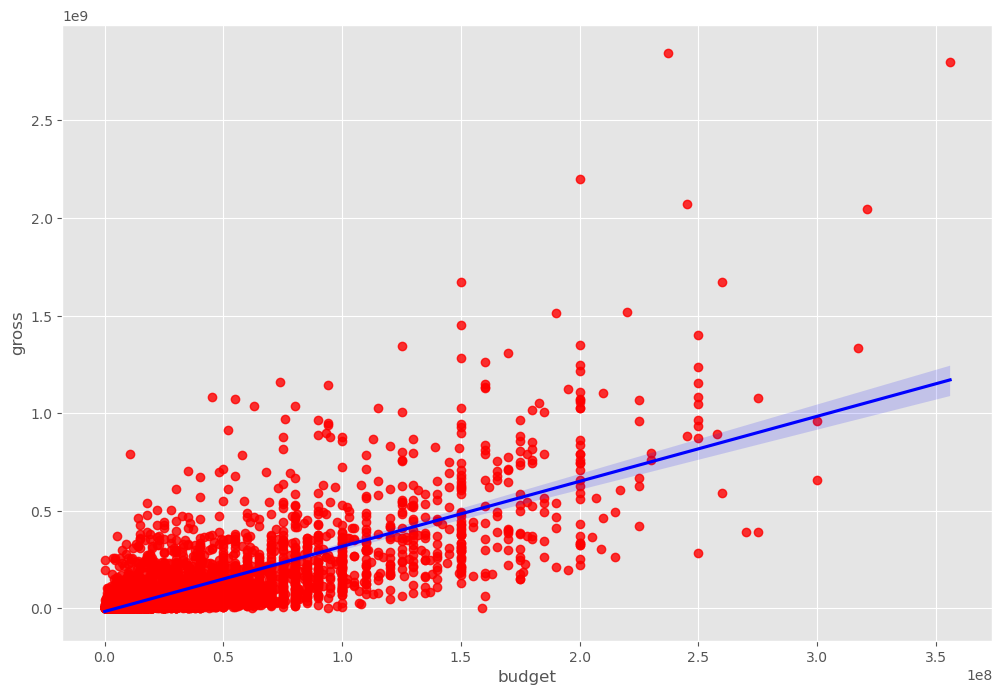

In [41]:
# Regression plot of budget vs gorss

sns.regplot(x='budget', y='gross', data=df1, scatter_kws={"color" : "red"}, line_kws={"color":"blue"})

In [43]:
# Looking for correlation
df1._get_numeric_data().corr(method='pearson')

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
yearcorrect,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


In [116]:
# There is high correlation between budget and gross

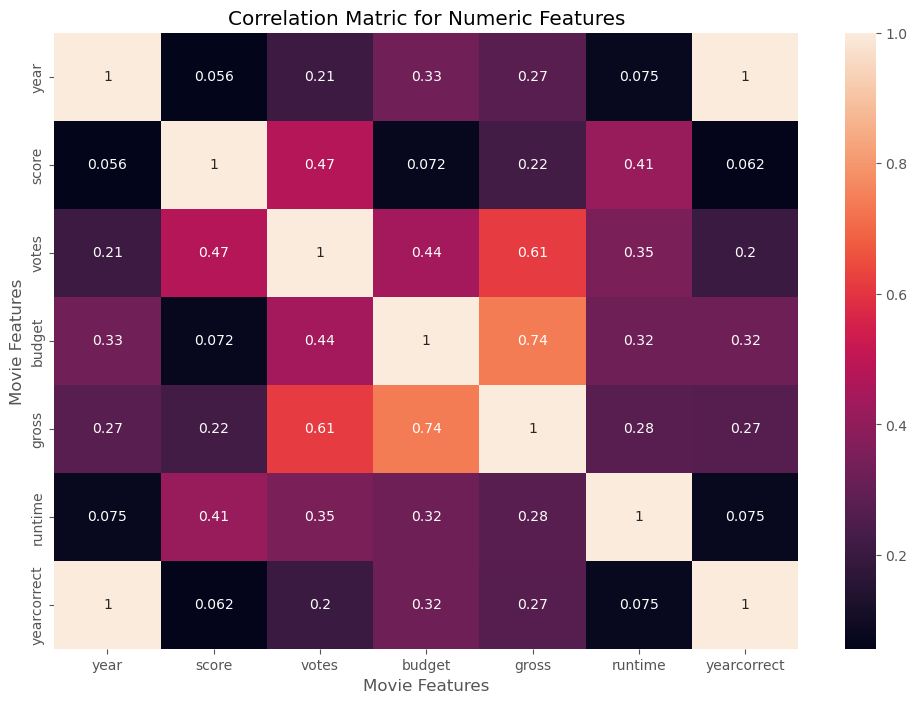

In [45]:
correlation_matrix = df1._get_numeric_data().corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matric for Numeric Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

plt.show()

In [50]:
df1['country'].unique()

array(['United Kingdom', 'United States', 'South Africa', 'West Germany',
       'Canada', 'Australia', 'Italy', 'South Korea', 'Sweden', 'Spain',
       'Hong Kong', 'Mexico', 'Switzerland', 'France', 'New Zealand',
       'Japan', 'Yugoslavia', 'Ireland', 'Germany', 'Austria', 'Portugal',
       'China', 'Taiwan', 'Republic of Macedonia', 'Russia',
       'Federal Republic of Yugoslavia', 'Iran', 'Czech Republic',
       'Denmark', 'Jamaica', 'Brazil', 'Aruba', 'Argentina', 'India',
       'Netherlands', 'Colombia', 'Norway', 'Israel', 'Belgium',
       'United Arab Emirates', 'Indonesia', 'Hungary', 'Kenya', 'Iceland',
       'Chile', 'Finland', 'Panama', 'Malta', 'Lebanon', 'Thailand'],
      dtype=object)

In [56]:
df1['company'].unique()

array(['Warner Bros.', 'Columbia Pictures', 'Lucasfilm', ...,
       'Clubhouse Pictures (II)', '20th Century Studios',
       'Beijing Diqi Yinxiang Entertainment'], dtype=object)

In [42]:
# Do some country tend to produce higher gross than others?
df_group = df1[['country', 'gross']]
df_group = df_group.groupby(['country'], as_index=False).mean()
df_group.head()

,country,gross
0,Argentina,2.604541e+07
1,Aruba,1.031992e+07
2,Australia,6.667391e+07
3,Austria,4.178149e+07
4,Belgium,5.733134e+06
5,Brazil,1.352507e+07
6,Canada,5.166269e+07
7,Chile,2.797202e+07
8,China,2.425353e+08
9,Colombia,1.259463e+07


In [44]:
# Sort Country from higher gross
df_group.sort_values(by=['gross'], inplace=False, ascending=False)

,country,gross
29,Malta,3.527941e+08
32,New Zealand,3.487975e+08
13,Finland,2.500630e+08
8,China,2.425353e+08
38,South Africa,1.379522e+08
47,United States,1.090055e+08
43,Taiwan,9.585037e+07
46,United Kingdom,9.217826e+07
26,Japan,8.907907e+07
45,United Arab Emirates,8.858613e+07


In [48]:
# Do some company tend to produce higher gross?
df_group_2 = df1[['company', 'gross']]
df_group_2 = df_group_2.groupby(by=['company'], as_index=False).mean()
df_group_2.head()

,company,gross
0,"""DIA"" Productions GmbH & Co. KG",44350926.0
1,"""Weathering With You"" Film Partners",193457467.0
2,.406 Production,10580.0
3,1492 Pictures,108628125.0
4,1818 Productions,12232628.0


In [52]:
# Sort Company from higher gross
df_group_2.sort_values(by=['gross'], inplace=False, ascending=False)

,company,gross
983,Marvel Studios,1.255466e+09
820,Illumination Entertainment,1.097122e+09
628,Fairview Entertainment,9.665549e+08
190,B24,8.806815e+08
182,Avi Arad Productions,8.560852e+08
406,Chris Morgan Productions,7.590569e+08
870,Jolie Pas,7.584118e+08
945,Lucasfilm,7.185352e+08
982,Marvel Entertainment,7.144215e+08
227,Beijing Dengfeng International Culture Communi...,6.999925e+08


In [56]:
# Use ANOVA to find difference between means from each Country
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('gross ~ country', data= df1).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

                sum_sq      df         F    PR(>F)
country   3.573466e+18    49.0  2.099427  0.000012
Residual  1.865726e+20  5371.0       NaN       NaN


In [ ]:
# The result show that there is no significance difference between means from each Country

In [60]:
# Use ANOVA to find difference between mean from each Company
model = ols('gross ~ company', data= df1).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

                sum_sq      df         F        PR(>F)
company   6.771589e+19  1474.0  1.480681  4.327561e-21
Residual  1.224302e+20  3946.0       NaN           NaN


In [ ]:
# The result show that there is no significance difference between means from each Company